In [2]:
# Import required packages
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import rasterio as rio

# Set AOI and band_path
aoi = "koumassi_focus_ps"
band_path = '..\\data\\'+aoi+"\\"

Include instructions for user to run notebooks in certain order. This notebook then reads in tif files from the other notebooks and shows off each main resulting plot from the various approaches explored. 

 ## Improving flood detection algorithm using high resolution imagery


### Introduction
We live in an urban world, and it is only going to become more urban. Urban growth in the next 30 years is forecasted to be centered in low and middle income countries in Africa and Asia. Additionally, with climate change, more extreme events are expected, in many of the same areas impacted by urban growth. Each year, tens of millions of people are impacted by floods, costing billions of dollars. Looking into the near future, this means there will be a lot of people vulnerable to natural disasters, such as floods. 

Cloud to Street is a start-up focused on developing high resolution maps for flood-prone areas in low and middle income countries so that planners, insurers and disaster response agencies have the best information available to better understand and price flood risk, insure vulnerable populations, prepare for flood and respond to flood events in near real time. Cloud to Street has developed flood detection algorithm, but there are some inherent challenges in developing flood extent maps in urban environments. For one, the NDWI does not work well in cities due to interference from the built environment. The modified NDWI (MDNWI) which can overcome some of this interference can not be calculated as high resolution imagery generally does not include the short-wave infrared (SWIR) band needed for its calculation. And finally, shadow from buildings looks visually similar to flooding and can be misidentified by the current algorithm.

#### Plot of RGB image of interest
This is an image of major flooding event on June 17, 2016 in Abidjan, Ivory Coast. The image is centered on a region within the city known as Koumassi. 

### Approach
This notebook was developed using high resolution imagery from DigitalGlobe's WorldView-2 satellite. Imagery was accessed using a free trial from the GBDX data platform. The image is from a major flooding event on June 17, 2016 in Abidjan, Ivory Coast. Abidjan is the fourth most populous city in sub-Saharan African, with a population of 5 million people. The coastal/wetland city is prone to flooding in summer months. The image is focused on a region within the city known as Koumassi. 

The project goals are to improve flood-detection algorithms with a focus on differentiating building shadows and flood waters. Three approaches were explored: thresholding, support vector machine (SVM) and kmeans. The thresholding approach was meant to be a way to mimic the current algorithm utilized by Cloud to Street. However, it is important to note that this analysis utilizes pan-sharpened images, while Cloud to Street used multispectral images. Thresholding was completed by first developing and applying a cloud mask to the image. Next, NDWI and NDVI values were calculated. Additionally, new measures which are not currently employed by Cloud to Street were calculated. These measures included the morhphological building index (MBI) (Huang et al. 2012) to identify buildings and the morphological shadow index (MSI) (Huang et al. 2015) to identify building shadow. Each of the four indices were evaluated using a histogram and thresholds were set (Building Shadow = MSI >= XX, Flood = NDWI_yellow >= YY, Vegetation = NDVI >= ZZ, Building = MBI >= XX). Masks were created for each of the thresholded indices and combined with the following hierarchy: Building Shadow, Flood, Vegetation and Building, with the exception that Building trumped Flood.  

Building shadows can be well represented by the morphological shadow index (MSI) (Huang et al. 2012). **Include equation** The normalized different water index (NDWI) (McFeeters et al. 1996) is a useful measure for identifying open water, though there are challenges associated with interference from the built environment. The modified NDWI (MNDWI) (Xu, 2006) is not an option for this particular project due to the lack of a SWIR band in WorldView-2 imagery. For this project, several different NDWI values were calculated based on algorithms designed by Cloud to Street and proposed by Xie et al.(2016). 

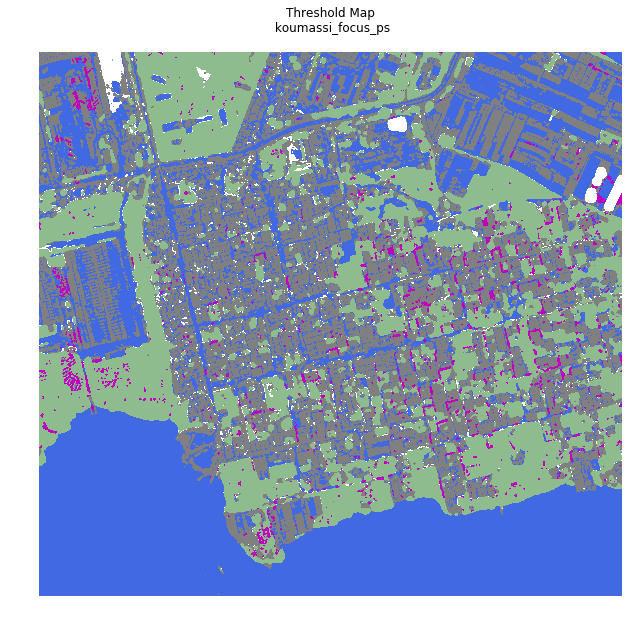

In [13]:
threshold_path = os.path.join(
    band_path, "outputs\\raster_files\\threshold\\index_comb_yellow.tif")
with rio.open(threshold_path) as src:
    threshold_map = src.read()

threshold_map = np.squeeze(threshold_map)
# Plot thresholded map
fig, ax = plt.subplots(figsize=(20, 10))
cmap = ListedColormap(['white', 'grey', 'darkseagreen', 'royalblue', 'm'])
ax.imshow(threshold_map, cmap=cmap)
ax.set(title="Threshold Map\n "+aoi+"\n")
ax.set_axis_off()
# fig.text(0, 0, 'Threshold values: Building Shadow = MSI >= XX, Flood = NDWI_yellow >= YY, Vegetation = NDVI >= ZZ, Building = MBI >= XX')
plt.show()

#### Plot showing threshold results (NDWI, MSI, NDVI, MBI)
This plot was developed by combining masks developed for flood, building shadow, vegetation and buildings. The flood mask was developed using NDWIs with a threshold value of X. The shadow mask was developed using the MSI with a threshold value of Y. The vegetation mask was created using the NDVI with a threshold value of Z. The building mask was developed using a threshold value of XX. 

#### Plot showing accuracy score and confusion matrices for threshold results
Short description of accuracy score result

# Supervised machine learning

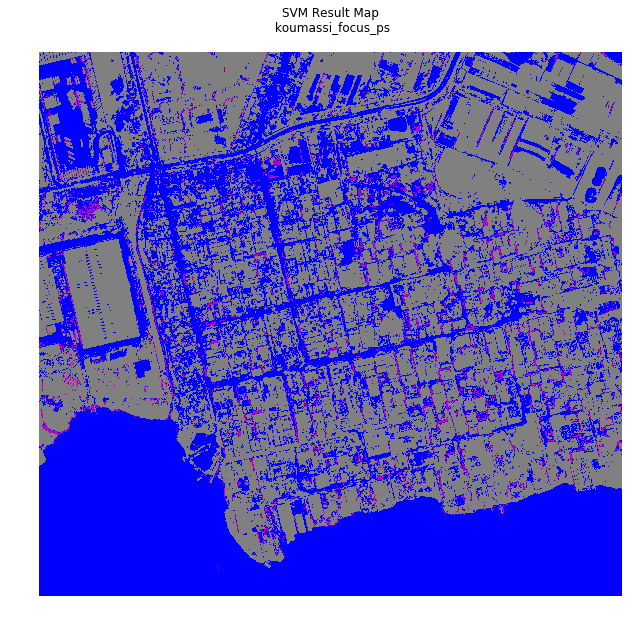

In [12]:
svm_path = os.path.join(
    band_path, "outputs\\svm\SVM_map.tif")
with rio.open(svm_path) as src:
    svm_map = src.read()
    
svm_map = np.squeeze(svm_map)
# Plot thresholded map
fig, ax = plt.subplots(figsize=(20, 10))
cmap = ListedColormap(['m','blue','grey'])
im = ax.imshow(svm_map,cmap=cmap)
ax.set(title="SVM Result Map\n "+aoi+"\n")
ax.set_axis_off()
plt.show()

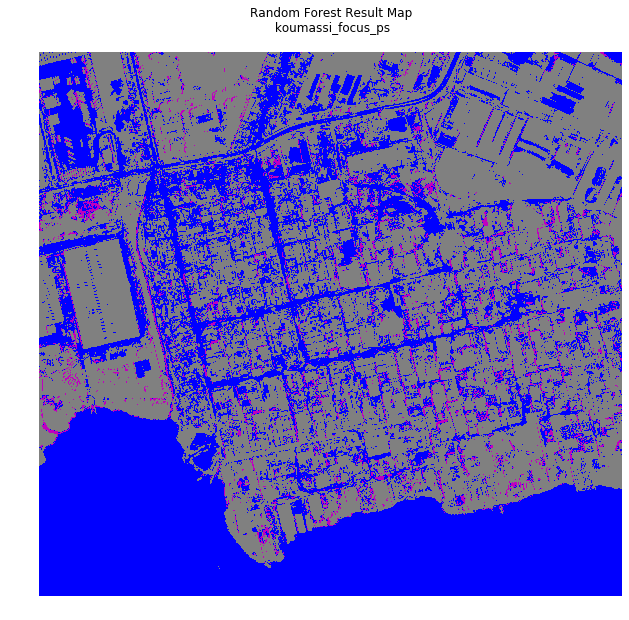

In [5]:
random_forest_path = os.path.join(
    band_path, "outputs\\svm\\random_forest_map.tif")
with rio.open(random_forest_path) as src:
    random_forest_map = src.read()
    
random_forest_map = np.squeeze(random_forest_map)
# Plot thresholded map
fig, ax = plt.subplots(figsize=(20, 10))
cmap = ListedColormap(['m','blue','grey'])
im = ax.imshow(random_forest_map,cmap=cmap)
ax.set(title="Random Forest Result Map\n "+aoi+"\n")
ax.set_axis_off()
plt.show()

#### Plot showing SVM results
This plot shows the results from a Support Vector Machine model. 

#### Plot showing accuracy score
Short description of accuracy score results

# Unsupervised machine learning

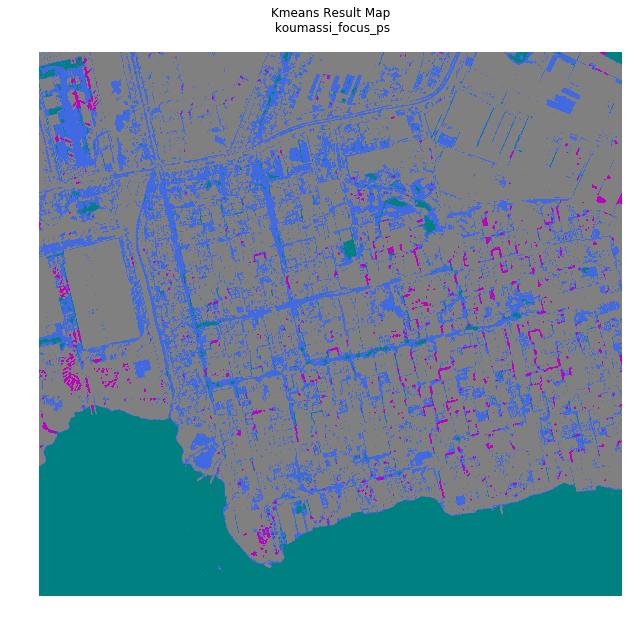

In [16]:
#### Plot showing kmeans results
kmeans_path = os.path.join(
    band_path, "outputs\\kmeans\\kmeans_with_shadow_mask.tif")
with rio.open(kmeans_path) as src:
    kmeans_map = src.read()
    
kmeans_map = np.squeeze(kmeans_map)
# Plot kmeans map
fig, ax = plt.subplots(figsize=(20, 10))
cmap = ListedColormap(['grey','grey','teal','grey','m','grey','grey','royalblue'])
im = ax.imshow(kmeans_map,cmap=cmap)
ax.set(title="Kmeans Result Map\n "+aoi+"\n")
ax.set_axis_off()
plt.show()

#### Plot showing accuracy score
Short description of accuracy score results

### Discussion
Short discussion on each approach 

### Conclusions and Future Work
Final conclusions, recommendations and future work

### References
-Huang, X., Xie, C., Fang, X., Zhang, L. (2015) Combining Pixel-and Object-Based Machine Learning for Identification of Water-Body Types from Urban High-Resolution Remote-Sensing Imagery. IEEE J. Sel. Top. Appl. Earth Obs. Remote Sens. 8, 2097–2110.

-Huang, X., and Zhang, L. (2012) Morphological Building/Shadow Index for Building Extraction From High-Resolution Imagery Over Urban Areas. IEEE J. Sel. Top. Appl. Earth Obs. Remote Sens. 5, 161-172.

-Xie, C., Huang, X., Zeng, W., & Fang, X. (2016). A novel water index for urban high-resolution eight-band WorldView-2 imagery. International Journal of Digital Earth, 9(10), 925–941.

-Cloud to Street. Urban Flood Mapping Using Very-High Resolution Satellite Imagery. Available at: https://abidjan.cloudtostreet.info/info